In [ ]:
#installing tensorflow and keras
!pip install tf_keras
#importing the relevent libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
#importing OS environment
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [ ]:
#reading the csv data
df = pd.read_csv("ml.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
#separating dependent and independent variables
X = df.iloc[:, 1:8]
y = df.iloc[:, 8]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
#importing the relevent libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#scaling X data using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform(y)

In [ ]:
#splitting into training and testing data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=23)

In [ ]:
#Converting X values to tensors
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor=tf.constant(y_train.values.reshape(-1,1), dtype=tf.float32) # Reshape to (400, 1)
X_train_tensor

<tf.Tensor: shape=(400, 7), dtype=float32, numpy=
array([[-0.83943   , -1.019128  , -0.09979273, ..., -0.52351284,
        -0.6230308 , -1.1281521 ],
       [-0.83943   ,  0.29757482, -0.09979273, ..., -0.52351284,
        -0.9540428 ,  0.8864053 ],
       [-0.2190742 ,  0.46216267, -0.09979273, ...,  0.55812526,
         0.37000522, -1.1281521 ],
       ...,
       [-0.7508077 ,  0.46216267, -0.09979273, ..., -0.52351284,
        -0.9540428 ,  0.8864053 ],
       [-0.30769646, -0.5253644 , -0.09979273, ...,  1.0989443 ,
         0.12174622, -1.1281521 ],
       [ 0.4899038 ,  1.2851019 ,  1.650957  , ...,  1.0989443 ,
         1.2968389 ,  0.8864053 ]], dtype=float32)>

In [ ]:
#setting values for epochs, learning rate, weight and bias
learning_rate = 0.01
epochs = 1000
W = tf.Variable(tf.random.normal(shape=(X_train_scaled.shape[1], 1), dtype=tf.float32), name='weights')
b = tf.Variable(tf.zeros(shape=(1,), dtype=tf.float32), name='bias')
#using stochiastic gradient descent optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

In [ ]:
#Defining functions for training model
#linear regression model as y=mx+c
def linear_regression(X):
    return tf.matmul(X, W) + b

#loss function of sqquare of actual-predicted value
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


Epoch 0, Loss: 0.8957693576812744
Epoch 100, Loss: 0.10378313064575195
Epoch 200, Loss: 0.04270847141742706
Epoch 300, Loss: 0.021706758067011833
Epoch 400, Loss: 0.012265886180102825
Epoch 500, Loss: 0.007841011509299278
Epoch 600, Loss: 0.005719306413084269
Epoch 700, Loss: 0.00468272902071476
Epoch 800, Loss: 0.004168112296611071
Epoch 900, Loss: 0.003909124527126551

Testing Mean Squared Error: 0.003289134008809924


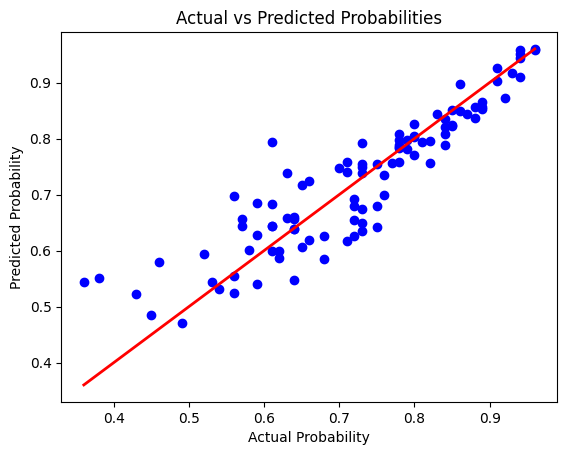

In [ ]:
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        #predictions using X_train_tensor on linear regression model and calculation of error
        current_loss = mean_squared_error(y_train_tensor, linear_regression(X_train_tensor))

    #calculation of the gradient of loss
    gradients = tape.gradient(current_loss, [W, b])

    #using SGD optimizer to optimize weight and bias
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {current_loss.numpy()}")

#converting test data to tensors
X_test_tensor = tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.constant(y_test.values.reshape(-1, 1), dtype=tf.float32)

#test_predictions vs values for calculation of loss
test_loss = mean_squared_error(y_test_tensor, linear_regression(X_test_tensor))

print(f"\nTesting Mean Squared Error: {test_loss.numpy()}")

# plotting actual vs predicted probabilities
plt.scatter(y_test, linear_regression(X_test_tensor).numpy(), color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  color='red', linewidth=2)
plt.xlabel("Actual Probability")
plt.ylabel("Predicted Probability")
plt.title("Actual vs Predicted Probabilities")
plt.show()

In [ ]:
#calculation of mse using predicted and actual y test values
mse = mean_squared_error(y_test_tensor, linear_regression(X_test_tensor)).numpy()
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 0.003289134008809924


Epoch 0, Loss: 0.003777296282351017
Epoch 100, Loss: 0.0037095630541443825
Epoch 200, Loss: 0.003674496430903673
Epoch 300, Loss: 0.0036562299355864525
Epoch 400, Loss: 0.0036466687452048063
Epoch 500, Loss: 0.0036416444927453995
Epoch 600, Loss: 0.003638996509835124
Epoch 700, Loss: 0.003637596732005477
Epoch 800, Loss: 0.0036368558648973703
Epoch 900, Loss: 0.003636462613940239


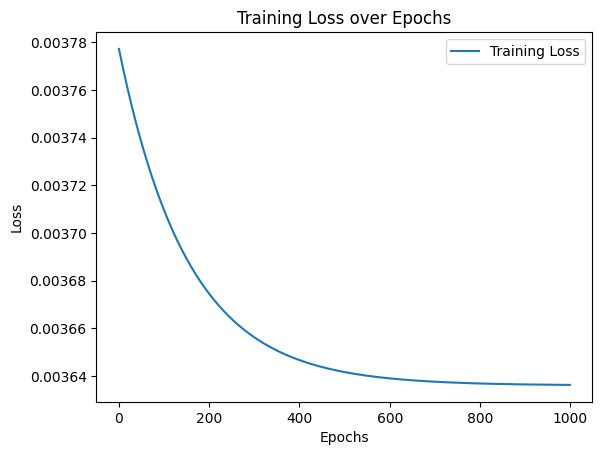

In [ ]:
train_losses=[]
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tensor)
        current_loss = mean_squared_error(y_train_tensor, predictions)

    # Calculation of the gradient of loss
    gradients = tape.gradient(current_loss, [W, b])

    # Using SGD optimizer to optimize weight and bias
    optimizer.apply_gradients(zip(gradients, [W, b]))

    # Append the current loss to the list
    train_losses.append(current_loss.numpy())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {current_loss.numpy()}")

# Plotting loss vs. epochs
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
#binning chance of admit values for logistic regression
bin_edges=[0.3,0.5,0.7,1.0]
bin_labels=['Low','Medium','High']
df['Admit Category']=pd.cut(df['Chance of Admit '],bins=bin_edges,labels=bin_labels,include_lowest=True)

The logistic regression model is usually used for binary classification problems. Since we are using binning to form 3 classes, it may be used for multiclass classification problems but linear regression would be a better choice of model. As we will see, the accuracy is not as high for this model.

In [ ]:
#defining X and y values for logistic regression
X_logistic = df.drop(['Chance of Admit ', 'Admit Category','Serial No.'], axis=1)
y_logistic = df['Admit Category']
X_logistic

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
# Scaling logistic regression values for X
scaler_logistic = StandardScaler()
X_logistic_scaled = scaler_logistic.fit_transform(X_logistic)

In [ ]:
#splitting logistic regression data
X_train_scaled_logistic, X_test_scaled_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic_scaled, y_logistic, test_size=0.2, random_state=42)

In [ ]:
#converting to TensorFlow tensors
X_train_tensor_logistic = tf.constant(X_train_scaled_logistic, dtype=tf.float32)
X_test_tensor_logistic = tf.constant(X_test_scaled_logistic, dtype=tf.float32)
y_train_tensor_logistic = tf.constant(y_train_logistic.cat.codes.values, dtype=tf.float32)
y_test_tensor_logistic = tf.constant(y_test_logistic.cat.codes.values, dtype=tf.float32)

In [ ]:
# Define logistic regression model
logistic_model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_train_scaled_logistic.shape[1],))
])

#compiling the model
logistic_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#training the model
history = logistic_model.fit(X_train_tensor_logistic, y_train_tensor_logistic, epochs=50, verbose=1)

Epoch 1/50
13/13 [==============================] - 31s 2ms/step - loss: 1.2064 - accuracy: 0.3550
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 1.0816 - accuracy: 0.4075
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.9914 - accuracy: 0.5000
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.9264 - accuracy: 0.5625
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.8769 - accuracy: 0.6200
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.8392 - accuracy: 0.6500
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.8099 - accuracy: 0.6700
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.7848 - accuracy: 0.6850
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.7643 - accuracy: 0.6875
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.7472 - accuracy: 0.6925
Epoch 11/50
13/13 

Usually logistic regression problems are binary in nature. Softmax gives decimal probabilities to each class in a multi-class problem like this one. These probabilities must add up to 1. This constraint helps training converge more quickly than it otherwise would.

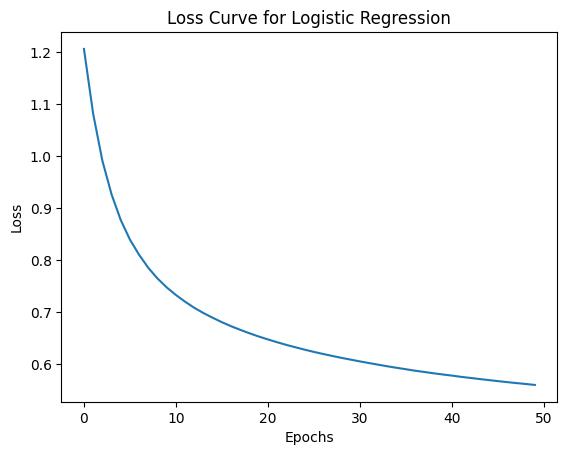

4/4 [==============================] - 1s 5ms/step - loss: 0.6085 - accuracy: 0.7100
Accuracy: 0.7099999785423279


In [ ]:
# Display loss for each epoch
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Logistic Regression')
plt.show()

# Evaluate accuracy
loss, accuracy = logistic_model.evaluate(X_test_tensor_logistic, y_test_tensor_logistic)
print(f'Accuracy: {accuracy}')

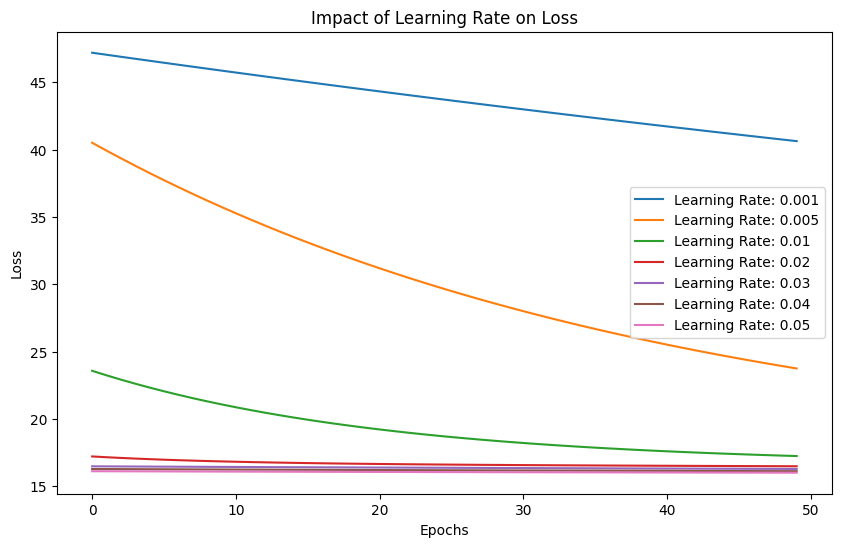

In [ ]:
# generating random data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 5 * X + 1 + np.random.randn(100, 1) * 4

# converting to tf tensors
X_tensor = tf.constant(X, dtype=tf.float32)
y_tensor = tf.constant(y, dtype=tf.float32)

#defining linear regression model
W = tf.Variable(tf.random.normal(shape=(1, 1)))
b = tf.Variable(tf.random.normal(shape=(1,)))

# function to find mse
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# function to train the model
def train_model(learning_rate):
    optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

    losses = []
    for epoch in range(50):
        with tf.GradientTape() as tape:
            y_pred = tf.matmul(X_tensor, W) + b
            loss = mean_squared_error(y_tensor, y_pred)
        gradients = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(gradients, [W, b]))
        losses.append(loss.numpy())

    return losses

#trying different learning rates to see the difference in performance
# learning_rates = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]

#training the model
plt.figure(figsize=(10, 6))
for lr in [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]:
    losses = train_model(lr)
    plt.plot(losses, label=f'Learning Rate: {lr}')

#plotting the different learning rates
plt.title('Impact of Learning Rate on Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Learning rate parameter determines at what speed we will move towards the optimal weights. It impacts the divergence or convergence of the model. If too large, we will skip the optimal solution. If too small, we will need too many iterations to converge to the best values. So using an optimal learning rate is crucial.

<ipython-input-30-e179e408e682>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


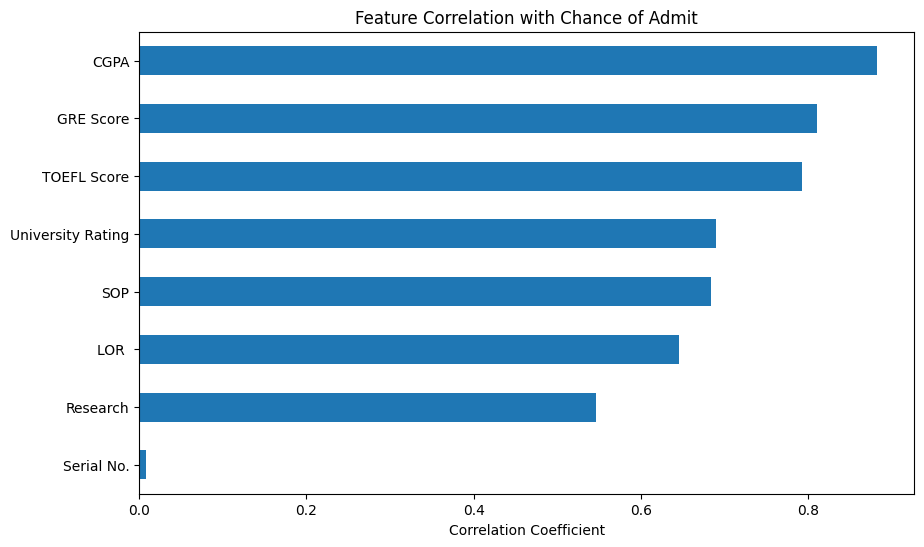

In [ ]:
# calculating correlation coefficients
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Chance of Admit '].drop('Chance of Admit ')

#plotting a bar plot to compare correlation beteen different features ith Chance of Admit
plt.figure(figsize=(10, 6))
correlation_with_target.sort_values().plot(kind='barh')
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlation with Chance of Admit')
plt.show()


In [ ]:
# feature selection of top features
top_features = correlation_with_target.abs().nlargest(3).index
X_top = df[top_features]
y1 = df['Chance of Admit ']

In [ ]:
#splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_top, y1, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#printing mean square error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Feature Selection: {mse}')


Mean Squared Error with Feature Selection: 0.004216051080066654


We can see that the accuracy of the model is actual decreasing on choosing only top 4 features as the mse in increasing. Thus, we notice that feature selection is not always beneficial to the accuracy of a model. In this case, all the features had a high weightage of role to play in finding the accurate output and removing any of them gave lower accuracy.

In [1]:
#importing necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
#using k-fold cross-validation for linear and logistic regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#linear regression
model = LinearRegression()
mse_scores_lr = -cross_val_score(model, X_top, y1, scoring='neg_mean_squared_error', cv=kf)
print(f'Linear Regression Cross-Validation Mean Squared Error: {np.mean(mse_scores_lr)}')

# Logistic Regression
y_binary = np.where(df['Chance of Admit '] >= 0.5, 1, 0)
model_logistic = LogisticRegression()
accuracy_scores_logistic = cross_val_score(model_logistic, X_top, y_binary, scoring='accuracy', cv=kf)
print(f'Logistic Regression Cross-Validation Accuracy: {np.mean(accuracy_scores_logistic)}')

Linear Regression Cross-Validation Mean Squared Error: 0.003978185374326803
Logistic Regression Cross-Validation Accuracy: 0.942


In [ ]:
#converting y data to binary using threshold 0.5
y_binary = np.where(df['Chance of Admit '] >= 0.5, 1, 0)

# splitting data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_top, y_binary, test_size=0.2, random_state=42)

#logistic sigmoid regression model
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train_tf.shape[1],))
])

#compling model and training
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_tf.fit(X_train_tf, y_train_tf, epochs=50, batch_size=32, verbose=1)

# calculating accuracy
accuracy_tf = model_tf.evaluate(X_test_tf, y_test_tf)[1]
print(f'Logistic Regression with TensorFlow Accuracy: {accuracy_tf}')

Epoch 1/50
13/13 [==============================] - 1s 2ms/step - loss: 12.7882 - accuracy: 0.9300
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 12.4370 - accuracy: 0.9300
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 12.1132 - accuracy: 0.9300
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 11.8085 - accuracy: 0.9300
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 11.4832 - accuracy: 0.9300
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 11.1733 - accuracy: 0.9300
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 10.8498 - accuracy: 0.9300
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 10.5514 - accuracy: 0.9300
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 10.2310 - accuracy: 0.9300
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 9.9444 - accuracy: 0.9300
Epoch 11/5

This model’s accuracy is much higher than that of the linear regression model.

In [ ]:
#converting y data to binary using threshold 0.4 which is optimised value
y_binary = np.where(df['Chance of Admit '] >= 0.4, 1, 0)

# splitting data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_top, y_binary, test_size=0.2, random_state=42)

#logistic sigmoid regression model
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train_tf.shape[1],))
])

#compling model and training
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#optimising number of epochs to 100
model_tf.fit(X_train_tf, y_train_tf, epochs=100, batch_size=32, verbose=1)

# calculating accuracy
accuracy_tf = model_tf.evaluate(X_test_tf, y_test_tf)[1]
print(f'Logistic Regression with TensorFlow Accuracy: {accuracy_tf}')

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 21.4974 - accuracy: 0.0175
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 15.9408 - accuracy: 0.0175
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 10.4038 - accuracy: 0.0175
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 4.8939 - accuracy: 0.0175
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.5875
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9825
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9825
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.9825
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9825
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9825
Epoch 